In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 绽放反应  

## 伤害计算公式  
$$反应基础伤害 * 等级系数 * 反应基础倍率 * (1 + \frac{16*精通}{2000+精通} + 反应伤害提升) * 抗性系数 * 额外收益$$

- 等级系数：角色等级当然越高越好
- 反应基础倍率：绽放 : 超/烈绽放 = 2 : 3
- 反应伤害提升：如花海四件套效果
- 额外收益：如草神2命带来的暴击期望
- 抗性系数:  
$$抗性系数 = \begin{cases}
1 - \frac{抗性}{2} ,& x<0 \\
1 - 抗性 ,& 0 <= 抗性 < 0.75 \\
\frac{1}{1+ 4 * 抗性} ,& x>=0.57 \\
\end{cases}$$

### 公式测试「久岐忍」+「纳西妲」超绽放*  
![测试角色](./asset/image/bloom_test_characters.png)  
89级时的`反应基础伤害 * 等级系数 * 反应基础倍率 = 1405.10 * 3`  
久岐忍战斗状态下精通为`892.30 = 702.30 + 150 + 40`(饰金4 +150精通场景下)  
在纳家做客时`1117.8 = 892.30 + 902.00 * 0.25`
纳西妲命座二效果: 固定的10%暴击,100%暴击伤害  
测试靶子: 海乱鬼-公义全元素抗性`10%`  
纳西妲深林套四件效果: 草属性抗性`-30%`  
抗性系数为`1.1`
伤害计算如下:  

In [2]:
damageTestTable = [
  ['基础不暴击', 1405.10 * 3 * (1 + (16 * 892.30/(2000 + 892.30))) * 1.1],
  ['基础暴击', 1405.10 * 3 * (1 + (16 * 892.30/(2000 + 892.30))) * 1.1 * 2],
  ['智慧殿堂下不暴击', 1405.10 * 3 * (1 + (16 * 1117.8/(2000 + 1117.8))) * 1.1],
  ['智慧殿堂下暴击', 1405.10 * 3 * (1 + (16 * 1117.8/(2000 + 1117.8))) * 1.1 * 2]
]

print(tabulate(damageTestTable, floatfmt='.3f', tablefmt='github'))

|------------------|-----------|
| 基础不暴击       | 27524.876 |
| 基础暴击         | 55049.751 |
| 智慧殿堂下不暴击 | 31235.322 |
| 智慧殿堂下暴击   | 62470.643 |


#### 实测结果
![实测结果1](./asset/image/bloom_test_result_1.jpg)  

## 精通收益与圣遗物  

### 公式与精通有关的部分  
$$\frac{16*精通}{2000+精通}$$

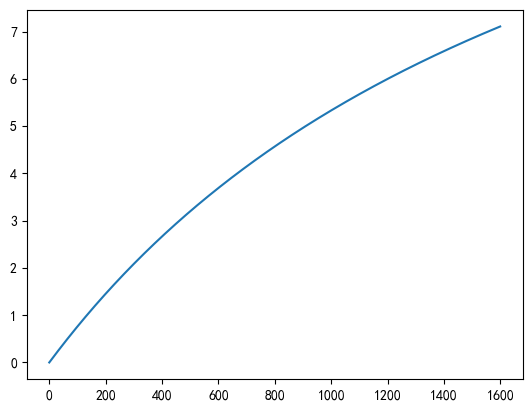

In [3]:
x = np.arange(0, 1600)
plt.plot(x, (16*x)/(2000+x))
plt.show()

因乐园套增加反应伤害,于是带上反应伤害加成

$$\frac{16*精通}{2000+精通} + 反应伤害加成$$

以发射器的圣遗物选择精精精(主词条187*3), 武器(4星武器铁峰刺)精通165为例  

- 散件2+2:  
$$精通 = 165 + 80 * 2 + 187 * 3 + 其他精通$$

In [4]:
# 散件2+2
def eFn1(otherEm):
  return 165 + 80*2 + 187*3 + otherEm

- 饰金: 二件套+80 四件套+150(每个不同属性队友+50,按全部不同计算。注:双草共鸣可给全队加成最大100精通,有条件可以上双草)
$$精通 = 165 + 80 + 150 + 187 * 3 + 其他精通$$

In [5]:
# 饰金2个不同属性队友
def eFn2(otherEm):
  return 165 + 80 + 100 + 187*3 + otherEm
# 饰金3个不同属性队友
def eFn3(otherEm):
  return 165 + 80 + 150 + 187*3 + otherEm

- 乐园(花神):  
$$精通 = 165 + 80 + 187 * 3 + 其他精通$$
$$反应伤害 = 0.4 * (1 + 0.25 * n) \quad \forall n\in{0,1,2,3,4}$$

In [6]:
# 乐园
def eFn4(otherEm):
  return 165 + 80 + 187*3 + otherEm

### 圣遗物副词条精通上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|----|----|----|
| 16 19 21 32 | 32-46 | 48-69 | 64-92 | 80-115 | 96-138 |

### 按照副词条提供的精通,不同套装提供的加成

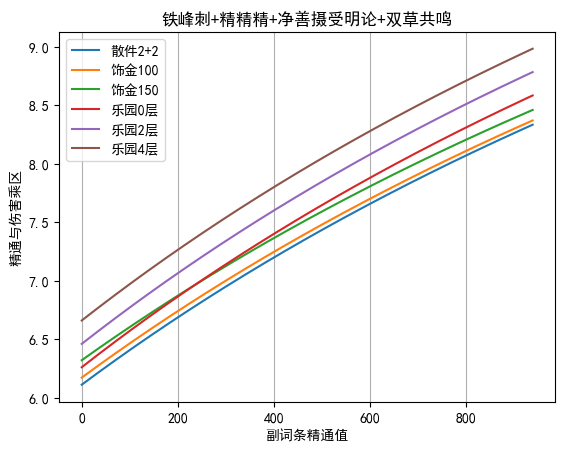

In [7]:
# 副词条 + 草神净善摄受明论250 + 双草100
subEm = np.arange(0, 250 + 138 * 5)
em1 = eFn1(subEm + 250 + 100)
em2= eFn2(subEm + 250 + 100)
em3 = eFn3(subEm + 250 + 100)
em4 = eFn4(subEm + 250 + 100)
plt.plot(subEm, (16 * em1)/(2000 + em1), label = '散件2+2')
plt.plot(subEm, (16 * em2)/(2000 + em2), label = '饰金100')
plt.plot(subEm, (16 * em3)/(2000 + em3), label = '饰金150')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.4, label = '乐园0层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.6, label = '乐园2层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.8, label = '乐园4层')
plt.xlabel('副词条精通值')
plt.ylabel('精通与伤害乘区')
plt.title('铁峰刺+精精精+净善摄受明论+双草共鸣')
plt.legend()
plt.grid(axis='x')
plt.show()

#### 副词条250 草神大招250 双草100, 各套装加成差距

In [8]:
em3001 = eFn1(250 + 250 + 100)
em3002 = eFn2(250 + 250 + 100)
em3003 = eFn3(250 + 250 + 100)
em3004 = eFn4(250 + 250 + 100)
dm3001 = (16 * em3001)/(2000 + em3001)
dm3002 = (16 * em3002)/(2000 + em3002)
dm3003 = (16 * em3003)/(2000 + em3003)
dm30040 = (16 * em3004)/(2000 + em3004) + 0.4
dm30042 = (16 * em3004)/(2000 + em3004) + 0.6
dm30044 = (16 * em3004)/(2000 + em3004) + 0.8
dm300Table = [
    ['散件2+2', None, dm3002 - dm3001, dm3003 - dm3001, dm30040- dm3001, dm30042 - dm3001, dm30044- dm3001],
    ['饰金100', dm3001 - dm3002, None, dm3003 - dm3002, dm30040- dm3002, dm30042 - dm3002, dm30044- dm3002],
    ['饰金150', dm3001 - dm3003, dm3002 - dm3003, None, dm30040- dm3003, dm30042 - dm3003, dm30044- dm3003],
    ['乐园0层', dm3001 - dm30040, dm3002- dm30040, dm3003 - dm30040, None, dm30042 - dm30040, dm30044 - dm30040],
    ['乐园2层', dm3001 - dm30042, dm3002- dm30042, dm3003 - dm30042, dm30040 - dm30042, None, dm30044 - dm30042],
    ['乐园4层', dm3001 - dm30044, dm3002- dm30044, dm3003 - dm30044, dm30040- dm30044, dm30042 - dm30044, None],
]
print(tabulate(dm300Table, ['', '散件2+2', '饰金100', '饰金150', '乐园0层', '乐园2层', '乐园4层'], floatfmt='.3f', tablefmt='github'))

|         |   散件2+2 |   饰金100 |   饰金150 |   乐园0层 |   乐园2层 |   乐园4层 |
|---------|-----------|-----------|-----------|-----------|-----------|-----------|
| 散件2+2 |           |     0.052 |     0.181 |     0.184 |     0.384 |     0.584 |
| 饰金100 |    -0.052 |           |     0.128 |     0.132 |     0.332 |     0.532 |
| 饰金150 |    -0.181 |    -0.128 |           |     0.004 |     0.204 |     0.404 |
| 乐园0层 |    -0.184 |    -0.132 |    -0.004 |           |     0.200 |     0.400 |
| 乐园2层 |    -0.384 |    -0.332 |    -0.204 |    -0.200 |           |     0.200 |
| 乐园4层 |    -0.584 |    -0.532 |    -0.404 |    -0.400 |    -0.200 |           |


## 妮绽放(原绽放)

### 妮露生命值计算
**需求: >74444HP**  

| 加成方式(全满级) | 生命加成 |
|---|---|
| 基础生命值 | 15184 |
| 等级突破加成 | 28.8% |
| 圣遗物主属性-花 | 4780 |
| 圣遗物主属性-杯 | 46.6% |
| 圣遗物主属性-沙 | 46.6% |
| 圣遗物主属性-冠 | 46.6% |
| 圣遗物2件套-千岩 | 20% |
| 圣遗物2件套-花海 | 20% |
| 双水共鸣 | 25% |
| 武器副属性-圣显之钥 | 66.15% |
| 圣遗物副词条-百分比 | a% |
| 圣遗物副词条-数值 | b |

#### 圣遗物副词条生命上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|---|---|---|
| 4.1% 4.7% 5.3% 5.8% | 8.2%-11.6% | 12.3%-17.4% | 16.4%-23.2% | 20.5%-29% | 24.6%-34.8% |
| 209 239 269 299 | 418-598 | 627-897 | 836-1196 | 1045-1495 | 1254-1794 |

In [9]:
# expect
expectHp = 74444

baseHp = 15184 + 4780

# 0+1 2+2
hp1 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3 + 0.2 * 2)
# 0+1 2
hp2 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3 + 0.2)
# 0+1
hp3 = baseHp * (1 + 0.288 + 0.25 + 0.6615 + 0.466 * 3)
# 0+0 2+2
hp4 = baseHp * (1 + 0.288 + 0.25 + 0.466 * 3 + 0.2 * 2)
# 0+0
hp5 = baseHp * (1 + 0.288 + 0.25 + 0.466 * 3)
hpTable = [
    ['双水 生生生 套装2+2 专武', hp1, None],
    ['双水 生生生 套装2 专武', hp2, None],
    ['双水-生生生-专武', hp3, (expectHp - hp3)/baseHp],
    ['双水-生生生-套装2+2', hp4, (expectHp - hp4)/baseHp],
    ['双水-生生生', hp5, (expectHp - hp5)/baseHp]
]
print(tabulate(hpTable, headers = ['加成方式', 'HP', '副词条需求'], floatfmt='.3f', tablefmt='github'))

| 加成方式                 |        HP |   副词条需求 |
|--------------------------|-----------|--------------|
| 双水 生生生 套装2+2 专武 | 79806.090 |              |
| 双水 生生生 套装2 专武   | 75813.290 |              |
| 双水-生生生-专武         | 71820.490 |        0.131 |
| 双水-生生生-套装2+2      | 66599.904 |        0.393 |
| 双水-生生生              | 58614.304 |        0.793 |
